# Task 3

Find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You must incorporate principles such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


<IPython.core.display.Javascript object>


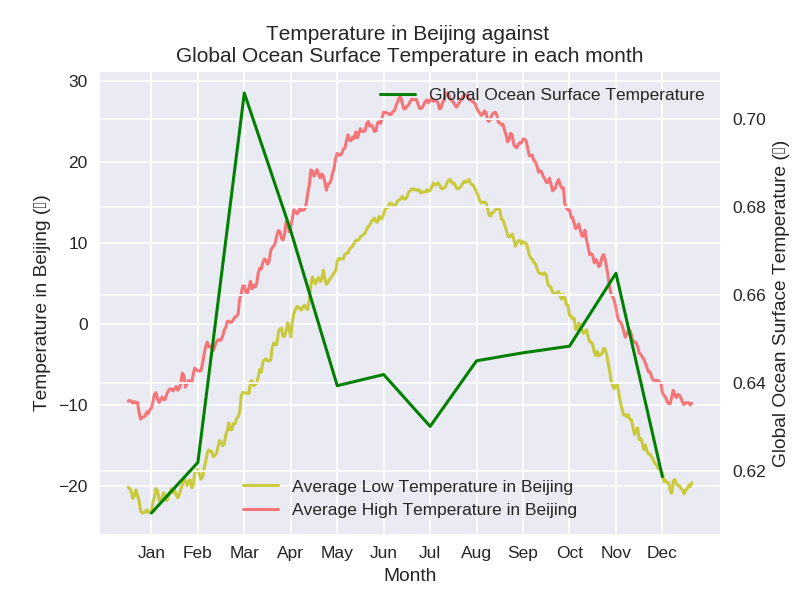

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

import seaborn as sns

%matplotlib notebook
plt.style.use('seaborn-colorblind')

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d25/9bc594d0d6bf5fec16beb2afb02a3b859b7d804548c77d614b2a6b9b.csv')

df2 = pd.read_csv('https://raw.githubusercontent.com/datasets/global-temp/master/data/monthly.csv')

df = df.sort(['ID', 'Date'])

df2 = df2.set_index('Date')
df2 = df2[df2['Source'] == 'GCAG']
df2 = df2.reset_index()

df2['Year'] = df2['Date'].apply(lambda x: x[:4]) 
df2['Month'] = df2['Date'].apply(lambda x: x[-2:])

df2 = df2[df2['Year'] >= '2000']

# Use to store the avgrage of ocean tmp
avg_ocean_tmp = []

for i in range(1,10):
    tmp = df2[df2['Month'] == '0'+str(i)].mean()
    avg_ocean_tmp.append(tmp)

for i in range(10,13):
    tmp = df2[df2['Month'] == str(i)].mean()
    avg_ocean_tmp.append(tmp)
    
# Pre-process the dataframe1
df['Year'] = df['Date'].apply(lambda x: x[:4])
df['Month-Day'] = df['Date'].apply(lambda x: x[5:])
df = df[df['Month-Day'] != '02-29']

# df['Month'] = df['Date'].apply(lambda x: x[5:7])

df_min = df[(df['Element'] == 'TMIN')]
df_max = df[(df['Element'] == 'TMAX')]

df_temp_min = df[(df['Element'] == 'TMIN')]
df_temp_max = df[(df['Element'] == 'TMAX')]

temp_min1 = df_temp_min.groupby('Month-Day')['Data_Value'].agg({'temp_min_mean_Beijing': np.mean})
temp_max1 = df_temp_max.groupby('Month-Day')['Data_Value'].agg({'temp_max_mean_Beijing': np.mean})


# Reset Index
temp_min1 = temp_min1.reset_index()
temp_max1 = temp_max1.reset_index()


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(temp_min1['temp_min_mean_Beijing']/10, 'y', alpha = 0.75, label = 'Average Low Temperature in Beijing')
ax1.plot(temp_max1['temp_max_mean_Beijing']/10, 'r', alpha = 0.5, label = 'Average High Temperature in Beijing')


a = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
b = [i+15 for i in a]

ax2.plot(b, avg_ocean_tmp, 'g', label = 'Global Ocean Surface Temperature')

ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature in Beijing (℃)')
ax2.set_ylabel('Global Ocean Surface Temperature (℃)')
plt.title('Temperature in Beijing against \nGlobal Ocean Surface Temperature in each month')

ax1.legend()
ax2.legend()

Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(b, Month_name)

for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

plt.show()